## 💻 1️⃣ Vytvoření simulovaných dat

Nejdřív jsem si vygeneroval **umělá data** – 100 po sobě jdoucích dní a náhodně se měnící cenu kolem hodnoty 100.
To dává křivku podobnou reálnému trhu.

In [1]:
import pandas as pd
import numpy as np

# Simulovaná data (100 dní)
np.random.seed(42)  # aby výsledek byl vždy stejný
dates = pd.date_range("2024-01-01", periods=100)
price = np.cumsum(np.random.randn(100)) + 100  # kumulativní součet náhodných změn

# DataFrame s daty
df = pd.DataFrame({"Date": dates, "Close": price})
df.set_index("Date", inplace=True)

➡️ `np.cumsum()` dělá to, že sčítá náhodné změny — tím vzniká přirozeně klikatý graf, který se chová podobně jako cena akcie.

## 💻 2️⃣ Výpočet SMA a EMA

Teď jsem k datům přidal dva indikátory:

* **SMA(20)** – jednoduchý klouzavý průměr
* **EMA(20)** – exponenciální klouzavý průměr

In [2]:
# SMA – průměr posledních 20 hodnot
df["SMA20"] = df["Close"].rolling(window=20).mean()

# EMA – větší váha novým hodnotám
df["EMA20"] = df["Close"].ewm(span=20, adjust=False).mean()


🧠 Klíč:

* `.rolling(window=20).mean()` – vezme 20 posledních cen a spočítá průměr
* `.ewm(span=20).mean()` – dělá to samé, ale s vážením (novější data mají větší vliv)


## 💻 3️⃣ Vykreslení pomocí `matplotlib`

Nakonec jsem všechno zobrazil do jednoho grafu, aby bylo vidět, jak se SMA a EMA liší.


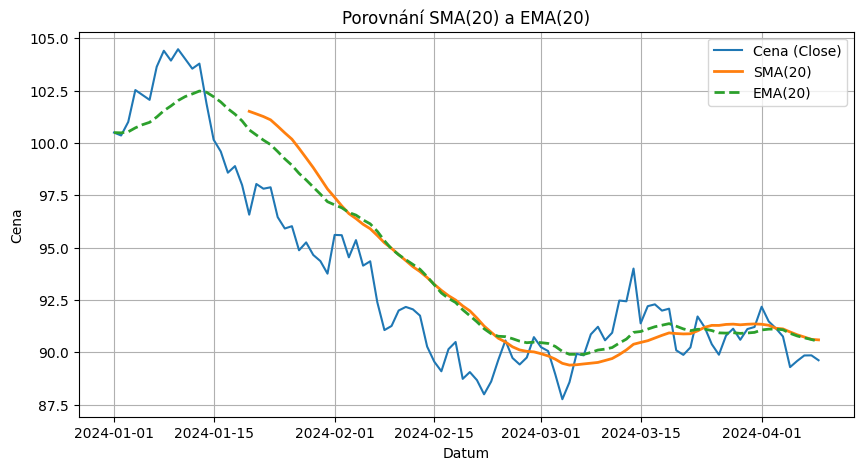

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Close"], label="Cena (Close)", linewidth=1.5)
plt.plot(df.index, df["SMA20"], label="SMA(20)", linewidth=2)
plt.plot(df.index, df["EMA20"], label="EMA(20)", linewidth=2, linestyle="--")
plt.title("Porovnání SMA(20) a EMA(20)")
plt.xlabel("Datum")
plt.ylabel("Cena")
plt.legend()
plt.grid(True)
plt.show()

💡 Co dělají hlavní části:

* `plt.plot()` – vykreslí jednotlivé linie
* `label` – popisek v legendě
* `linewidth` a `linestyle` – tloušťka a styl čáry
* `plt.legend()` – zobrazí legendu
* `plt.grid(True)` – zapne mřížku

## 📈 Výsledek

* **SMA (oranžová)** reaguje pomalu → ukazuje spíše dlouhodobý směr.
* **EMA (zelená)** reaguje rychle → otáčí se dřív a lépe zachytí krátkodobé změny trendu.
* Rozdíl je patrný hlavně při prudších pohybech ceny.